In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [55]:
nb_exp = 1
exp_prefix = "BOIS_Flexion_L_RUPT"
exp_numbers = [
    [f"_GR34-AM_E{exp_number:03d}" for exp_number in [54]],
]
exp_filenames = [f"{exp_prefix}{exp_suffix}" for exp_suffix in exp_numbers[0]]

e0 = [5.1]
w0 = [19.67]
s0 = [e0[i] * w0[i] for i in range(nb_exp)]
L0 = [150]  # mm longueur totale de l'éprouvette
l0 = [110]  # longueur utile, donnée manquante pour l'essai

In [56]:
# read infos of material
exp_filename = "BOIS_ST_L_RUPT"

# Open the .res file for reading
with open(exp_filename + ".info", "r") as file:
    # Initialize an empty dictionary to store the item values
    item_values = {}

    # Read each line in the file
    for line in file:
        # Split the line into item and value
        item, value = line.strip().split(":")

        # Store the value in the dictionary with the item name as the key
        item_values[item.strip()] = float(value.strip())

# Create variables with the item names as the variable names and assign the corresponding values
for item, value in item_values.items():
    globals()[item] = value

# Print the variables
print(item_values)

E = item_values["E"]
Rp02 = item_values["Rp02"]
Km = item_values["Km"]

{'E': 5011.56, 'Rp02': 20.5022, 'Rm': 20.5203, 'Au': -4.0878e-05, 'A': -1.0, 'strain rate': -1.0, 'eps to rm': 0.00398445, 'Kv': 1048.54, 'Km': 1753.28, 'Kt': 2608.63}


In [57]:
dat = [
    np.genfromtxt(
        exp + "/" + exp + ".raw", delimiter=",", skip_header=2, encoding="ISO-8859-1"
    )
    for exp in exp_filenames
]

In [58]:
print(dat[0][:10, :])

[[ 0.       0.       0.16286]
 [ 0.002    0.       0.16402]
 [ 0.004    0.       0.16713]
 [ 0.104   -0.01825  0.20584]
 [ 0.204   -0.03978  0.18129]
 [ 0.304   -0.05995  0.17018]
 [ 0.404   -0.07996  0.13897]
 [ 0.504   -0.09996 -0.03935]
 [ 0.604   -0.12008 -0.34858]
 [ 0.704   -0.13997 -0.90108]]


In [59]:
c_tps = 0  # s
c_dep_verin = 1  # mm
c_force = 2  # N
factor_force = -1  # raw values are <0
factor_dep_verin = -1  # raw values are <0

# extraction des données
tps = [experiment[:, c_tps] for experiment in dat]
dep_verin = [
    (experiment[:, c_dep_verin] - experiment[0, c_dep_verin]) * factor_dep_verin
    for experiment in dat
]
force = [(experiment[:, c_force] * factor_force) for experiment in dat]

In [60]:
print(type(dep_verin[0]))

<class 'numpy.ndarray'>


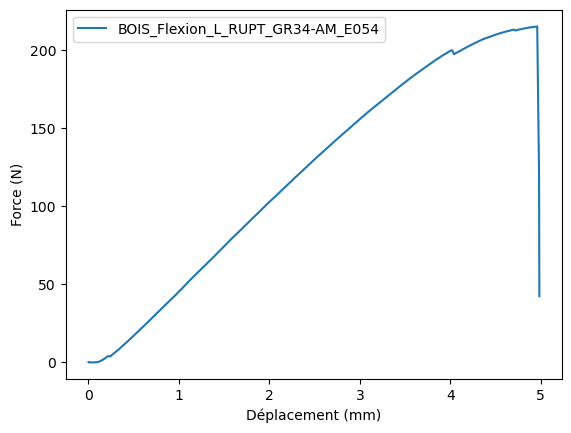

In [61]:
# tracé des courbes force déplacement
plt.figure()
for i in range(nb_exp):
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    # plt.axis([0, 0.5, 0, 1])
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend()
plt.show()

In [62]:
print(dep_verin[0])
print(force[0])

[-0.      -0.      -0.       0.01825  0.03978  0.05995  0.07996  0.09996
  0.12008  0.13997  0.16003  0.17997  0.19992  0.21992  0.23998  0.25993
  0.27999  0.29999  0.32     0.34     0.36     0.37995  0.40007  0.42001
  0.44002  0.46002  0.47997  0.49997  0.52003  0.53992  0.56004  0.57998
  0.59993  0.61999  0.63994  0.66     0.68006  0.7      0.71995  0.74001
  0.75996  0.77996  0.80002  0.81997  0.84003  0.86009  0.87998  0.89992
  0.91998  0.93999  0.95999  0.97999  1.       1.02     1.04     1.06006
  1.08001  1.09996  1.12002  1.14002  1.15997  1.18003  1.19997  1.21992
  1.24009  1.26004  1.27993  1.29999  1.31999  1.34     1.36006  1.38006
  1.40001  1.41995  1.44001  1.45996  1.48008  1.50002  1.52003  1.53997
  1.56003  1.57992  1.59998  1.61999  1.64005  1.65999  1.68005  1.7
  1.71995  1.74006  1.76007  1.78007  1.80002  1.82002  1.83997  1.86003
  1.87997  1.89992  1.92004  1.94004  1.95993  1.97999  1.99999  2.01994
  2.04     2.06006  2.08001  2.09995  2.12001  2.14002 

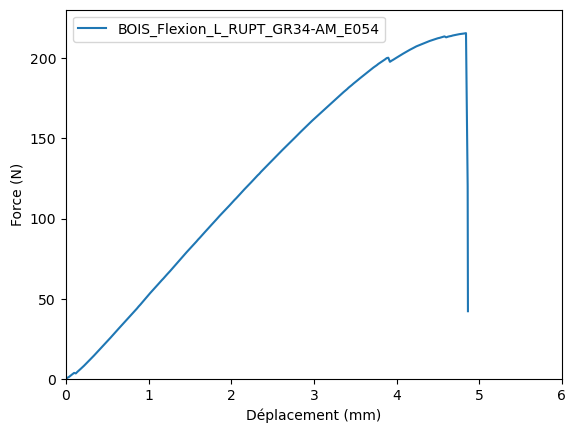

[array([0.     , 0.01989, 0.03995, 0.05989, 0.07984, 0.09984, 0.1199 ,
       0.13985, 0.15991, 0.17991, 0.19992, 0.21992, 0.23992, 0.25987,
       0.27999, 0.29993, 0.31994, 0.33994, 0.35989, 0.37989, 0.39995,
       0.41984, 0.43996, 0.4599 , 0.47985, 0.49991, 0.51986, 0.53992,
       0.55998, 0.57992, 0.59987, 0.61993, 0.63988, 0.65988, 0.67994,
       0.69989, 0.71995, 0.74001, 0.7599 , 0.77984, 0.7999 , 0.81991,
       0.83991, 0.85991, 0.87992, 0.89992, 0.91992, 0.93998, 0.95993,
       0.97988, 0.99994, 1.01994, 1.03989, 1.05995, 1.07989, 1.09984,
       1.12001, 1.13996, 1.15985, 1.17991, 1.19991, 1.21992, 1.23998,
       1.25998, 1.27993, 1.29987, 1.31993, 1.33988, 1.36   , 1.37994,
       1.39995, 1.41989, 1.43995, 1.45984, 1.4799 , 1.49991, 1.51997,
       1.53991, 1.55997, 1.57992, 1.59987, 1.61998, 1.63999, 1.65999,
       1.67994, 1.69994, 1.71989, 1.73995, 1.75989, 1.77984, 1.79996,
       1.81996, 1.83985, 1.85991, 1.87991, 1.89986, 1.91992, 1.93998,
       1.95993, 1.9

In [63]:
# cut beginning of data
delta_force = 1e-1
# find index of first time step where displacement is > delta_dep_verin
idxs = [np.where(force[i] > delta_force)[0][0] for i in range(nb_exp)]

# delete all data before this index
tps = [experiment[idx:] for experiment, idx in zip(tps, idxs)]
dep_verin = [
    (experiment[idx:] - experiment[idx]) for experiment, idx in zip(dep_verin, idxs)
]
force = [experiment[idx:] for experiment, idx in zip(force, idxs)]

plt.figure()
for i in range(nb_exp):
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    # plt.axis([0, 0.5, 0, 1])
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend()
    plt.axis([0, 6, 0, 230])
plt.show()

print(dep_verin)
print(force)

### Obtention de la rigidité de l'éprouvette en retranchant la rigidité machine


0.12283896468333655


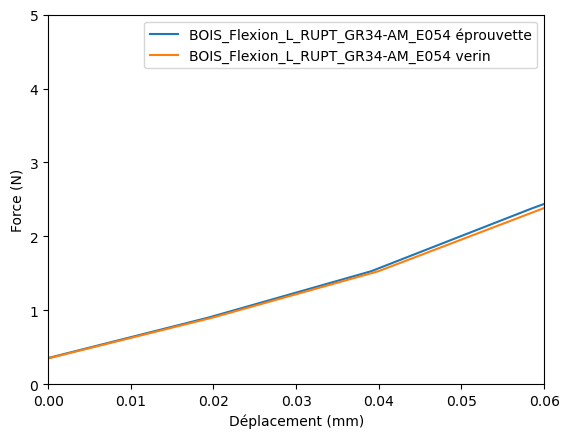

In [64]:
dep_tens = [dep_verin[i] - force[i] / Km for i in range(nb_exp)]

errors = [np.abs(dep_tens[i] - dep_verin[i]) for i in range(nb_exp)]
print(np.max(errors))

plt.figure()
for i in range(nb_exp):
    plt.plot(dep_tens[i], force[i], label=exp_filenames[i] + " éprouvette")
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i] + " verin")
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend()
    plt.axis([0, 0.06, 0, 5])
plt.show()

In [65]:
# changement de variable pour utiliser la déformation éprouvette
dep_verin = dep_tens

-0.00019881593356451907 3.6875824922431097


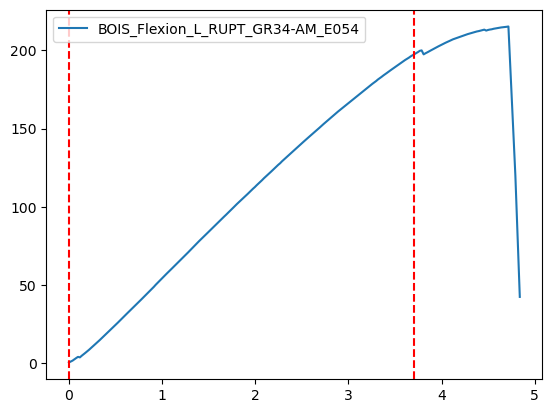

In [66]:
# compute slope in elastic_zone
elastic_zone = [0.0, 3.7]
elastic_idx = [
    [
        np.argmin(np.abs(dep_verin[i] - elastic_zone[0])),
        np.argmin(np.abs(dep_verin[i] - elastic_zone[1])),
    ]
    for i in range(nb_exp)
]

elastic_dep_verins = [
    dep_verin[i][elastic_idx[i][0] : elastic_idx[i][1]] for i in range(nb_exp)
]
elastic_forces = [
    force[i][elastic_idx[i][0] : elastic_idx[i][1]] for i in range(nb_exp)
]

print(elastic_dep_verins[0][0], elastic_dep_verins[0][-1])

plt.plot(dep_verin[0], force[0], label=exp_filenames[0])
# add elastic zone
plt.axvline(x=elastic_zone[0], color="r", linestyle="--")
plt.axvline(x=elastic_zone[1], color="r", linestyle="--")
plt.legend()
plt.show()

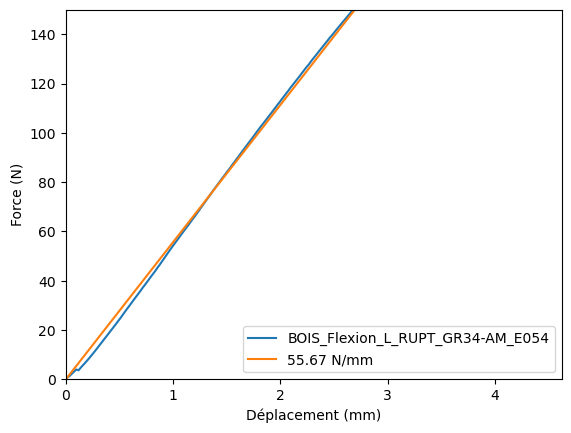

In [67]:
# compute K
Kv = [np.polyfit(elastic_dep_verins[i], elastic_forces[i], 1)[0] for i in range(nb_exp)]
dep_verin_lin_force_reg = [Kv[i] * dep_verin[i] for i in range(nb_exp)]
# plot linear regression and data
plt.figure()
for i in range(nb_exp):
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    plt.plot(
        dep_verin[i],
        dep_verin_lin_force_reg[i],
        label=f"{Kv[i]:.2f} N/mm",
    )
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.axis([elastic_zone[0], elastic_zone[1] * 5 / 4, 0, 150])
    plt.legend()

# # shift dep_verin to 0
# dep_verin = [experiment - experiment[0] for experiment in dep_verin]

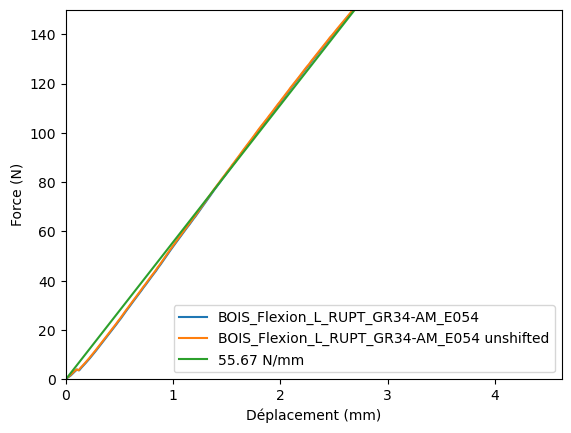

In [68]:
# shift dep_verin to 0
f0s = [force[i][0] for i in range(nb_exp)]
shifted_dep_verins = [dep_verin[i] + f0s[i] / Kv[i] for i in range(nb_exp)]

# compute K * x
# delta_x = 200
# dep_verin_unif = [np.linspace(0, max(dep_verin[i]), delta_x) for i in range(nb_exp)]
dep_verin_unif = shifted_dep_verins
shifted_forces_lin_reg = [Kv[i] * dep_verin_unif[i] for i in range(nb_exp)]

# plot shifted data
plt.figure()
for i in range(nb_exp):
    plt.plot(shifted_dep_verins[i], force[i], label=exp_filenames[i])
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i] + " unshifted")
    plt.plot(dep_verin_unif[i], shifted_forces_lin_reg[i], label=f"{Kv[i]:.2f} N/mm")
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.axis([elastic_zone[0], elastic_zone[1] * 5 / 4, 0, 150])
    plt.legend()
plt.show()

In [69]:
# calcul contrainte déformation ingénieurs
eps = [dep_verin[i] / l0[i] for i in range(nb_exp)]  # unité (mm/mm)
sig = [force[i] / s0[i] for i in range(nb_exp)]  # unité (N/mm^2--> MPa)

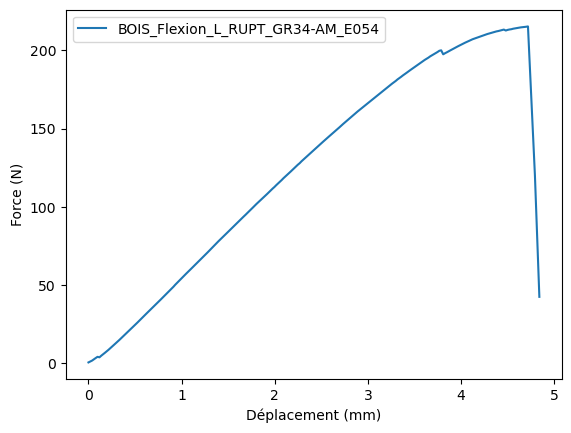

In [70]:
# tracé des courbes force déplacement
plt.figure()
for i in range(nb_exp):
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    # plt.axis([0, 0.5, 0, 1])
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend()
plt.show()

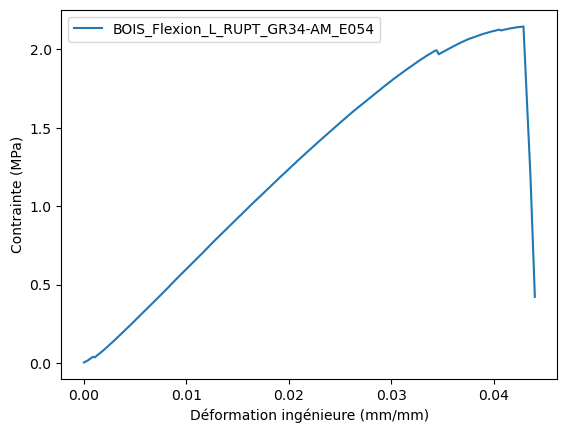

In [71]:
# tracé des courbes contrainte déformation
plt.figure()
for i in range(nb_exp):
    plt.plot(eps[i], sig[i], label=exp_filenames[i])
    plt.xlabel("Déformation ingénieure (mm/mm)")
    plt.ylabel("Contrainte (MPa)")
    plt.legend()
plt.show()

In [72]:
# stop the execution of cells below
sys.exit()

SystemExit: 

### Comparaison avec les courbes simulées dans abaq


In [ ]:
# Lecture des données abaq

abaq_force_factor = 4.0

abaq_filenames = ["ForceDep-flexion3p-Alu"]

abaq_data = [{"dep_verin": [], "force": []}]

for i in range(nb_exp):
    # Open the file
    with open(abaq_filenames[i] + ".txt", "r") as file:
        # Skip the first three lines
        for _ in range(4):
            next(file)

        # Read the remaining lines
        for line in file:
            # Split each line into two columns
            line_split = line.strip().split()
            # delete empty strings
            line_split = list(filter(None, line_split))

            if len(line_split) == 0:  # skip empty lines
                continue
            else:
                # take absolute value of force and displacement
                line_values = [abs(float(val)) for val in line_split]
                # multiply force by factor 4 (symetries)
                line_values[1] *= abaq_force_factor
                abaq_data[i]["dep_verin"].append(float(line_values[0]))
                abaq_data[i]["force"].append(float(line_values[1]))

In [ ]:
# abaq_data[0]

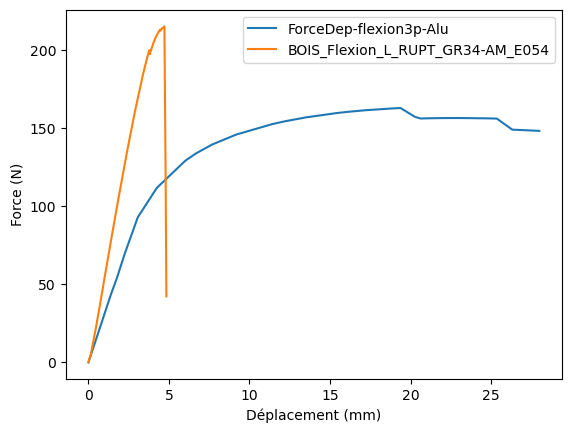

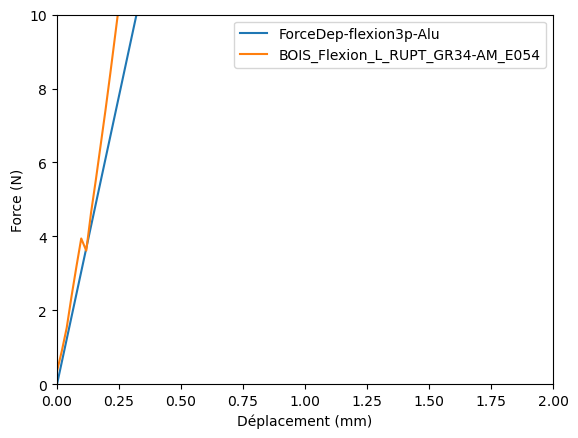

In [ ]:
# tracé des courbes force déplacement
plt.figure()
for i in range(nb_exp):
    plt.plot(abaq_data[i]["dep_verin"], abaq_data[i]["force"], label=abaq_filenames[i])
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend(loc="best")
plt.show()

# tracé des courbes force déplacement
plt.figure()
for i in range(nb_exp):
    plt.plot(abaq_data[i]["dep_verin"], abaq_data[i]["force"], label=abaq_filenames[i])
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend(loc="best")
    plt.axis([0, 2, 0, 10])
plt.show()

### Calcul de la rigidité par la théorie des poutres


In [ ]:
Rtot = [8 / 3 * E * w0[i] * e0[i] ** 3 / l0[i] ** 3 for i in range(nb_exp)]

shifted_forces_theo = [Rtot[i] * dep_verin_unif[i] for i in range(nb_exp)]

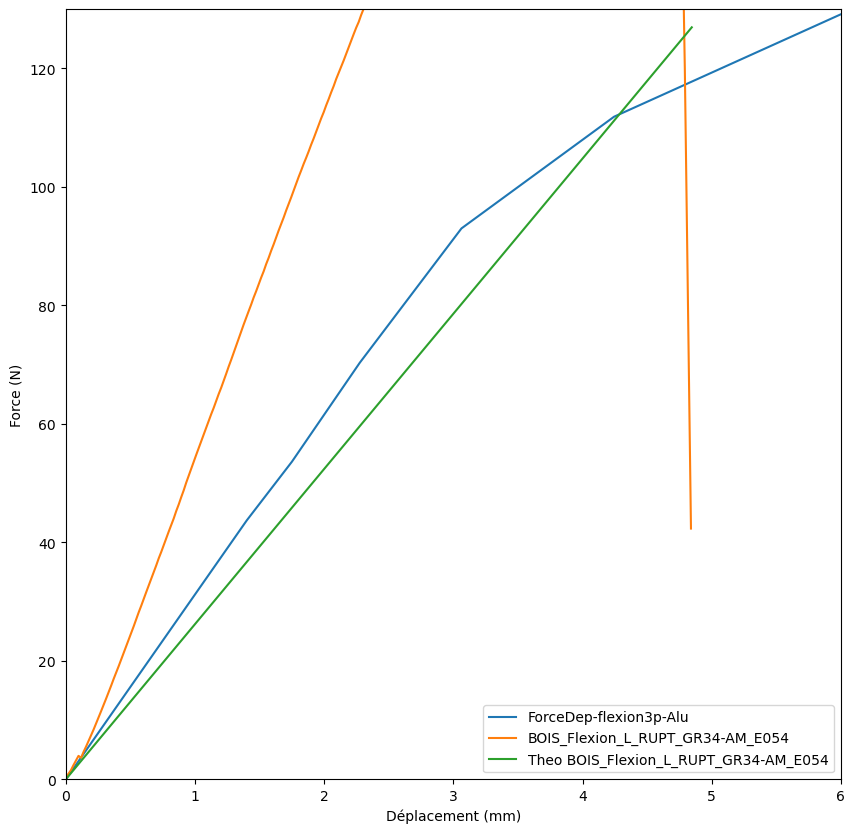

In [ ]:
# tracé des courbes force déplacement
plt.figure(figsize=(10, 10))
for i in range(nb_exp):
    plt.plot(abaq_data[i]["dep_verin"], abaq_data[i]["force"], label=abaq_filenames[i])
    plt.plot(dep_verin[i], force[i], label=exp_filenames[i])
    plt.plot(
        dep_verin_unif[i], shifted_forces_theo[i], label=f"Theo {exp_filenames[i]}"
    )
    plt.xlabel("Déplacement (mm)")
    plt.ylabel("Force (N)")
    plt.legend(loc="best")
    plt.axis([0, 6, 0, 130])
plt.show()